<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Ahmad !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Ahmad ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Ahmad dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# CHURN ANALYSIS

# Contents

    1. Introduction
    2. Menyiapkan Data dan Menganalisis Data    
        2.1. Mempelajari nilai yang hilang, rata-rata dan standar deviasinya dengan metode describe()
        2.2. Melihat nilai fitur rata-ratanya dalam dua kelompok, yaitu untuk mereka yang keluar (churn) dan untuk mereka 
             yang tinggal (gunakan metode groupby()).󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀢󠀳
        2.3. Membuat histogram dan distribusi fitur untuk mereka yang keluar (churn) serta mereka yang tinggal.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀣󠀳
        2.4. Membuat matriks korelasi
        
    3. Membangun model untuk memprediksi churn pengguna
        3.1. Membuat model klasifikasi biner untuk pelanggan, di mana fitur targetnya adalah pengguna yang akan keluar bulan 
             depan.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀧󠀳 Bagi datanya menjadi train set dan validation set menggunakan fungsi train_test_split().󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀨󠀳
        3.2. Melatih model pada train set dengan dua metode berikut: 
                - regresi logistik
                - random forest
        3.3. Mengevaluasi metrik-metrik accuracy, precision, dan recall untuk kedua model menggunakan validation set.󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀢󠀳󠀰 
        
     4.󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀦󠀳󠀰 Membuat klaster pengguna
        4.1. Memilih kolom yang berisi data churn dan menentukan klaster objeknya (pengguna):󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀨󠀳 Lakukan standardisasi terhadap 
             data.󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀩󠀳 
        4.2. Membuat matriks jarak berdasarkan matriks fitur yang telah distandardisasi dan membuat grafik 
             dendrogram menggunakan fungsi linkage()
        4.3. Melatih model pengklasteran dengan algoritma K-means dan prediksikan klaster pelanggannya dengan jumlah 
             klaster n=5             
        4.4. Memeriksa nilai rata-rata fitur untuk semua klaster.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀥󠀳󠀰 
        4.5. Membuat grafik distribusi fitur untuk setiap klaster.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀧󠀳󠀰 
        4.6. Menghitung tingkat churn untuk setiap klaster (gunakan metode groupby()) dan menentukan󠀲󠀡󠀥󠀥󠀧󠀨󠀦󠀠󠀳󠀰 Klaster pelanggan 
             mana yang cenderung akan pergi, dan mana yang akan tetap setia
    5. Kesimpulan Umum
    6. Rekomendasi dan Saran

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 1. Introduction

    Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan 
    data analitik yang mereka himpun.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀤󠀳 󠀰Salah satu masalah yang paling sering dijumpai oleh layanan pusat kebugaran dan bahkan layanan lainnya adalah perputaran pelanggan atau customer churn.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀥󠀳󠀰 Bagaimana ya cara mengetahui apakah pelanggan sudah 
    berhenti menggunakan layanan kita?󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀦󠀳󠀰 Kamu memang bisa menghitung tingkat churn berdasarkan jumlah orang yang 
    menghapus akun atau tidak memperbarui kontrak langganan mereka.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀧󠀳󠀰 Namun terkadang, kamu tidak bisa tahu dengan pasti 
    apakah seorang klien benar-benar sudah berhenti: bisa saja mereka meninggalkanmu secara diam-diam.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀨󠀳
    󠀰󠀰Untuk mengurangi tingkat churn, Model Fitness menerapkan digitalisasi terhadap sejumlah profil pelanggan.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀥󠀳󠀰 Yang bertujuan untuk menganalisis profil para pelanggan tersebut dan mengembangkan strategi retensi pelanggan (customer retention).󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀦󠀳

    Tujuan:
- Mempelajari cara memprediksi probabilitas churn (untuk bulan berikutnya) bagi setiap pelanggan
- Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan dan mendeskripsikan fitur-fitur utamanya
- Menganalisis faktor yang paling memengaruhi churn
- Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan
- Mengidentifikasi kelompok yang ditargetkan
- Merekomendasikan langkah-langkah untuk mengurangi churn
- Mendeskripsikan pola lain yang ditemui terkait interaksi pelanggan

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2. Menyiapkan Data  dan Menganalisis Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#data preprocessing
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', 300)

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000,0
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641,0
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662,0
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207,0


In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

    - Dataset ini mencakup kolom-kolom berikut:
 
    -'gender'- Nilai 1 = Pria, Nilai 0 = Wanita
    -'Near_Location' — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran. 
    -'Partner' — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan 
    para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
    -Promo_friends — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode 
    promo teman saat membayar keanggotaan pertama mereka)
    -'Phone' — apakah pengguna memberikan nomor telepon mereka
    -'Age'
    -'Lifetime' — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran
    -'Contract_period' — 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
    -'Month_to_end_contract' — sisa bulan sebelum kontrak berakhir
    -'Group_visits' — apakah pengguna mengambil bagian dalam sesi kelompok
    -'Avg_class_frequency_total' — frekuensi rata-rata kunjungan per minggu selama masa hidup (lifetime) pelanggan
    -'Avg_class_frequency_current_month' — frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan
    -'Avg_additional_charges_total' — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: 
    kafe, barang atletik, kosmetik, pijat, dll.
    - 'Churn' — churn aktual untuk bulan terkait

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.1.Memeriksa nilai yang hilang dan mem󠀲󠀨󠀣󠀠󠀳󠀰pelajari nilai rata-rata dan standar deviasinya

In [4]:
#Memeriksa missing values
gym.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

    - Data tidak mengandung missing values

In [5]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000
mean,0.510250000000000,0.845250000000000,0.48675000000000,0.308500000000000,0.903500000000000,4.68125000000000,0.412250000000000,29.184249999999999,146.943727809250021,4.322750000000000,3.724750000000000,1.879019712534937,1.767051822040508,0.265250000000000
std,0.499957425044087,0.361711412989101,0.49988689643489,0.461931916275352,0.295312634995689,4.54970585789327,0.492301256987942,3.258367102790006,96.355602395679838,4.191297434094276,3.749266820049219,0.972244872030617,1.052905717489531,0.441521429596796
min,0.000000000000000,0.000000000000000,0.00000000000000,0.000000000000000,0.000000000000000,1.00000000000000,0.000000000000000,18.000000000000000,0.148204788456624,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,27.000000000000000,68.868829978416670,1.000000000000000,1.000000000000000,1.180875086219582,0.963002948193214,0.000000000000000
50%,1.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,29.000000000000000,136.220158971036881,1.000000000000000,3.000000000000000,1.832768412113406,1.719574310109868,0.000000000000000
75%,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,6.00000000000000,1.000000000000000,31.000000000000000,210.949624655502134,6.000000000000000,5.000000000000000,2.536078338329289,2.510336265936281,1.000000000000000
max,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,12.00000000000000,1.000000000000000,41.000000000000000,552.590740386879816,12.000000000000000,31.000000000000000,6.023668475995910,6.146782880452392,1.000000000000000


    - Rata-rata jumlah pelanggan yang dekat lokasi adalah 0.85
    - Rata-rata usia pelanggan gym adalah 29.18 tahun
    - Rata-rata lifetime dari pelanggan gym adalah 3.7 bulan
    - Rata-rata tingkat Churn untuk bulan ini adalah 0.26

In [6]:
#Memeriksa jumlah masing-masing nilai untuk beberapa fitur

gym['gender'].value_counts()
    #Pelanggan pria lebih banyak daripada pelanggan wanita

1    2041
0    1959
Name: gender, dtype: int64

In [7]:
gym['Near_Location'].value_counts()
    #Pelanggan yang dekat lebih banyak daripada pelanggan yang jauh

1    3381
0     619
Name: Near_Location, dtype: int64

In [8]:
gym['Partner'].value_counts()
    #Pelanggan yang bukan karyawan mitra lebih banyak daripada pelanggan karyawan mitra

0    2053
1    1947
Name: Partner, dtype: int64

In [9]:
gym['Promo_friends'].value_counts()
    #Pelanggan yang bukan referensi dari teman lebih banyak daripada pelanggan referensi dari teman

0    2766
1    1234
Name: Promo_friends, dtype: int64

In [10]:
gym['Contract_period'].value_counts()
    #Pelanggan paling banyak mendaftar member untuk jangka waktu sebulan

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

In [11]:
gym['Group_visits'].value_counts()
    #Pelanggan yang tidak menagmbil sesi group lebih banyak daripada pelanggan yang mengambil sesi group

0    2351
1    1649
Name: Group_visits, dtype: int64

In [12]:
gym['Month_to_end_contract'].value_counts()
    #Pelanggan dengan sisa kontrak sebulan jumlahnya paling banyak

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: Month_to_end_contract, dtype: int64

In [13]:
gym['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

In [14]:
gym['Churn'].value_counts() / gym.shape[0] * 100

0    73.474999999999994
1    26.524999999999999
Name: Churn, dtype: float64

- Jumlah pelanggan yang berhenti menjadi member (Churn) ada 1061 pelanggan atau 26.53 %
- Jumlah pelanggan yang tetap menjadi member ada 2939 pelanggan atau 73.48 %

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.2. Lihat nilai fitur rata-ratanya dalam dua kelompok, yaitu untuk mereka yang keluar (churn) dan untuk mereka yang tinggal (gunakan metode groupby())

In [15]:
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037427696495,0.873086083701939,0.534195304525349,0.353521605988431,0.903708744470908,5.747192922762845,0.464103436543042,29.976522626743790,158.445714801611899,5.283089486219803,4.711806736985369,2.024875642518554,2.027881733095179
1,0.510838831291235,0.768143261074458,0.355325164938737,0.183788878416588,0.902921771913289,1.728557964184731,0.268614514608860,26.989632422243165,115.082898619287263,1.662582469368520,0.990574929311970,1.474994662372977,1.044545593398017


    - Berdasarkan tabel di atas, rata-rata pelanggan yang Churn yang dekat dari lokasi adalah 0.77
    - Rata-rata pelanggan yang Churn memiliki sisa kontrak 1.6 bulan
    - Rata-rata pelanggan yang Churn memiliki lifetime 0.9 bulan

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.3. Buat histogram dan distribusi fitur untuk mereka yang keluar (churn) serta mereka yang tinggal

In [16]:
#Menyusun function untuk membuat grafik Histogram 
def feat_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = gym[key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            sns.histplot(x_new[x_new[group_col]==cl][c],
                        label='{} = {}'.format(group_col, str(cl)), bins= 10, color='green', kde=True)
        plt.title(c)
        plt.legend()
        plt.show()

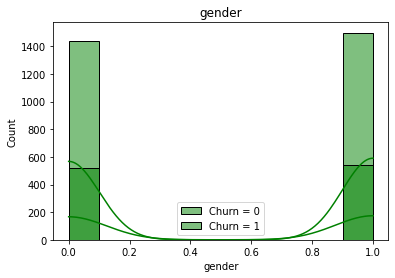

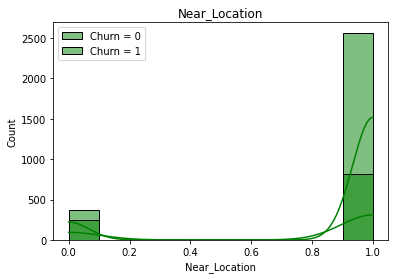

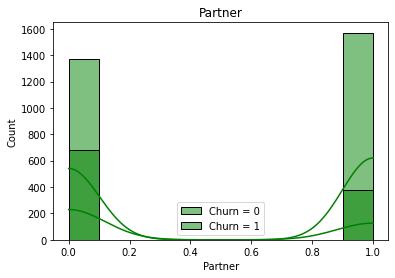

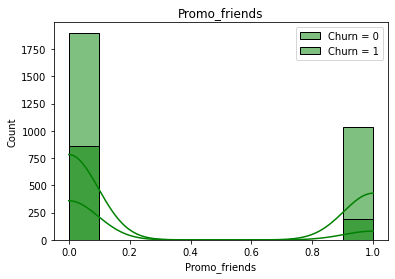

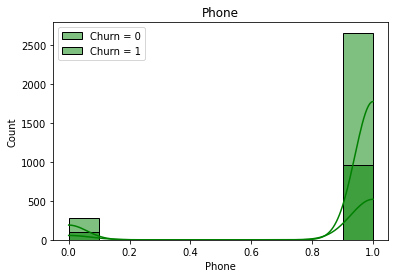

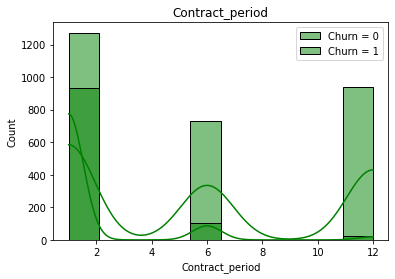

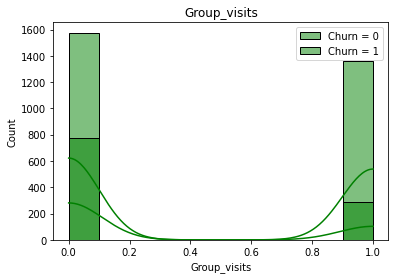

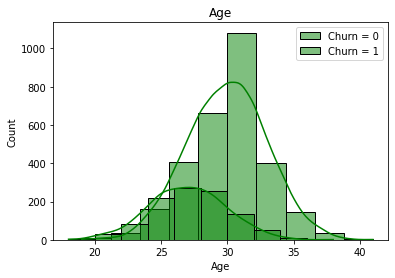

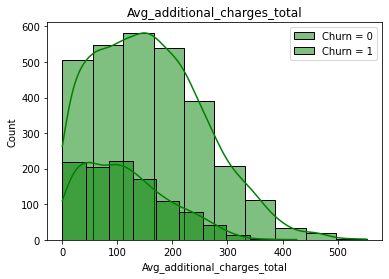

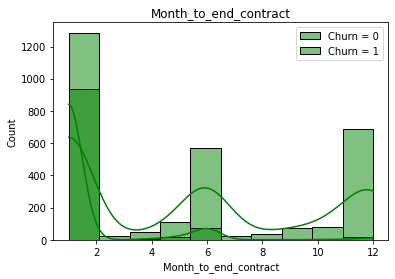

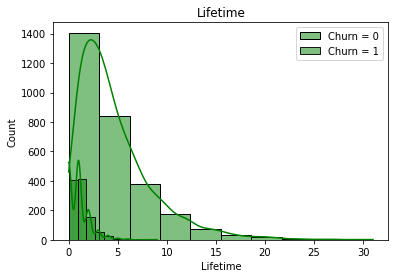

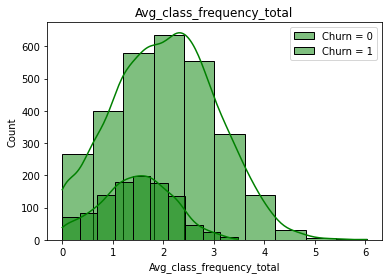

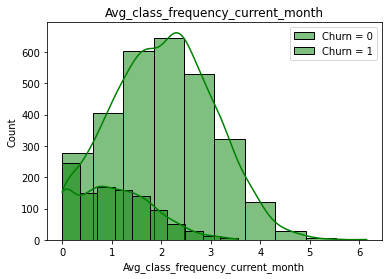

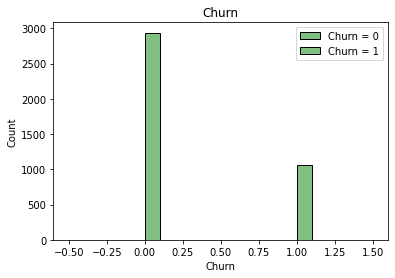

In [17]:
feat_hist(gym, 'Churn', gym.columns)

    -Berdasarkan grafik Histogram di atas:
        1. Untuk pelanggan yang lokasinya dekat dengan gym banyak yang Churn
        2. Pelanggan karyawan mitra banyak yang Churn
        3. Pelanggan yang berasal dari referensi teman banyak yang Churn
        4. Pelanggan dengan periode kontrak 12 bulan banyak yang Churn
        5. Pelanggan dengan Lifetime 0-5 bulan banyak yang Churn
        6. Pelanggan yang Churn kebanyakan berusia di atas 30 tahun

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2.4. Buat matriks korelasi dan tampilkan hasilnya

In [18]:
gym.corr()['Churn']

gender                               0.000707733985153
Near_Location                       -0.128097990299810
Partner                             -0.157985736985098
Promo_friends                       -0.162233077833515
Phone                               -0.001176601362480
Contract_period                     -0.389984211586078
Group_visits                        -0.175324655498149
Age                                 -0.404735252823589
Avg_additional_charges_total        -0.198697451068203
Month_to_end_contract               -0.381392983695714
Lifetime                            -0.438219968447980
Avg_class_frequency_total           -0.249715111332895
Avg_class_frequency_current_month   -0.412348390707265
Churn                                1.000000000000000
Name: Churn, dtype: float64

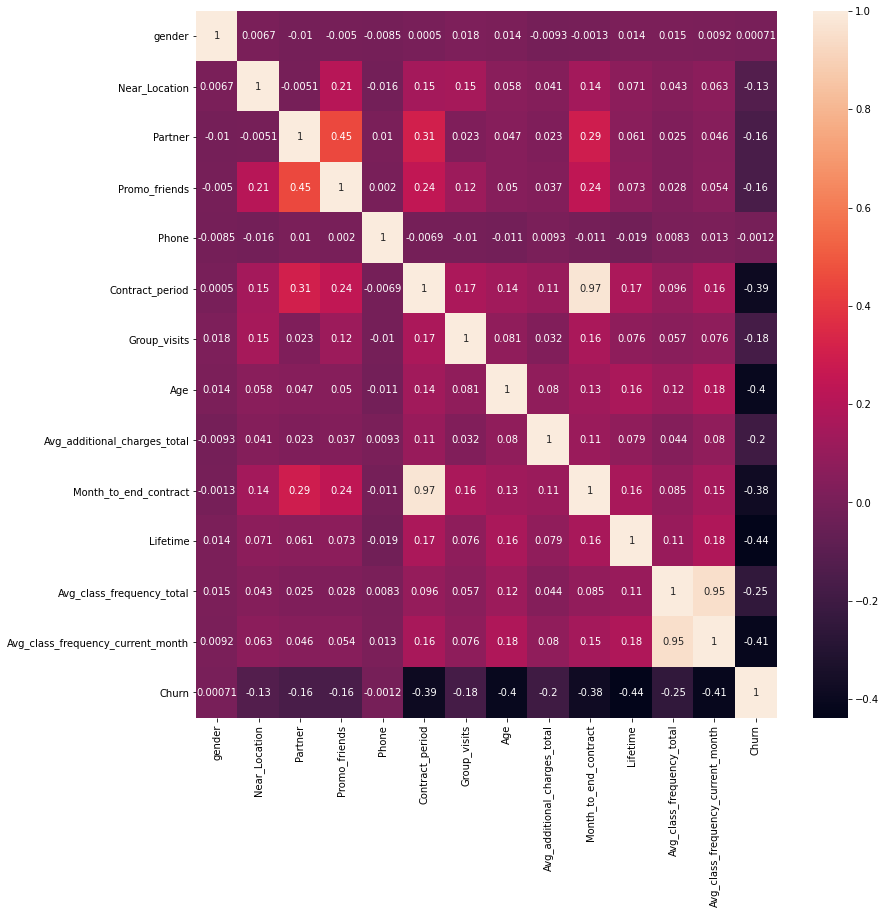

In [19]:
plt.figure(figsize= (13, 13))
sns.heatmap(gym.corr(), annot=True)
plt.show()

    - Berdasarkan grafik heatmap diatas faktor yang berpengaruh terhadap tingkat Churn adalah:
        - Semakin sedikit lifetime, tingkat Churn semakin naik
        - Semakin sedikit pelanggan menghadiri kelas dalam bulan berjalan, tingkat Churn akan meningkat
        - Semakin muda usia pelanggan, tingkat Churn akan meningkat

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3. Membangun model untuk memprediksi churn pengguna

# 3.1. Buat model klasifikasi biner untuk pelanggan, di mana fitur targetnya adalah pengguna yang akan keluar bulan depan.󠀲󠀡󠀥󠀥󠀧󠀨󠀣󠀧󠀳 Bagi datanya menjadi train set dan validation set menggunakan fungsi train_test_split()

In [20]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi fitur (matriks X) dan variabel target (y)
X = gym.drop(columns=['Churn'])
y = gym['Churn']

# Membagi data menjadi training set dan validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# 3.2.Latih model pada train set dengan dua metode berikut: Regresi Logistik dan Random Forrest


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

***1.Menggunakan Model Logistic Regression (LR)***

In [22]:
print('Ukuran *dataset*:', gym.shape)

# tinjau rasio antarkelas dataset
print('Rasio antar kelas:\n', gym['Churn'].value_counts())

# tetapkan algoritma model
lr_model = LogisticRegression()

# Melatih model
lr_model.fit(X_train, y_train)

# Menggunakan model terlatih untuk membuat prediksi
y_proba_lr = lr_model.predict_proba(X_val)
y_pred_lr = lr_model.predict(X_val)
y_pred_train_lr = lr_model.predict(X_train)

# Menampilkan metrik untuk prediksi yang dihasilkan
print('Accuracy score for logistic regression train is: {:.3f}'.format(accuracy_score(y_train, y_pred_train_lr)))
print('Accuracy score for logistic regression val is: {:.3f}'.format(accuracy_score(y_val, y_pred_lr)))
print('Precision score for logistic regression is: {:.3f}'.format(precision_score(y_val, y_pred_lr)))
print('Recall score for logistic regression is: {:.3f}'.format(recall_score(y_val, y_pred_lr)))

Ukuran *dataset*: (4000, 14)
Rasio antar kelas:
 0    2939
1    1061
Name: Churn, dtype: int64
Accuracy score for logistic regression train is: 0.931
Accuracy score for logistic regression val is: 0.922
Precision score for logistic regression is: 0.866
Recall score for logistic regression is: 0.813


***2.Menggunakan Model Random Forrest (RF)***

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Menentukan algoritma untuk model random forest
rf_model = RandomForestClassifier(n_estimators = 100, random_state= 0)

# latih model random forest
rf_model.fit(X_train, y_train)

# gunakan model terlatih untuk membuat prediksi
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)

# tampilkan semua metrik
print('Accuracy score for random forest is: {:.3f}'.format(accuracy_score(y_val, y_pred_rf)))
print('Precision score for random forest is: {:.3f}'.format(precision_score(y_val, y_pred_rf)))
print('Recall score for random forest is: {:.3f}'.format(recall_score(y_val, y_pred_rf)))

Accuracy score for random forest is: 0.916
Precision score for random forest is: 0.839
Recall score for random forest is: 0.818


# 3.3. Mengevaluasi metrik-metrik accuracy, precision, dan recall untuk kedua model menggunakan validation set

    - Untuk model Logistic Regression
    
        - Nilai akurasi = 92.2%
        - Nilai presisi = 86.6%
        - Nilai recall = 81.3%
        
    - Untuk model Random Forest
    
        - Nilai akurasi = 91.6%
        - Nilai presisi = 83.9%
        - Nilai recall = 81.8%
        
Nilai akurasi, presisi, dan recall untuk kedua model tidak berbeda jauh. Tapi nilai model Logistic Regression sedikit 
lebih baik daripada nilai model Random Forest.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 4.󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀦󠀳󠀰 Membuat klaster pengguna

# 4.1. Memilih kolom yang berisi data churn dan Menentukan klaster objeknya (pengguna):󠀲󠀡󠀥󠀥󠀧󠀨󠀤󠀨󠀳 Lakukan standardisasi terhadap data
             

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Melakukan standardisasi terhadap data
sc = StandardScaler()
x_sc = sc.fit_transform(gym.drop(columns=['Churn']))

In [27]:
x_sc

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 4.2.Gunakan fungsi linkage() untuk membuat matriks jarak berdasarkan matriks fitur yang telah distandardisasi dan buat grafik dendrogram

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

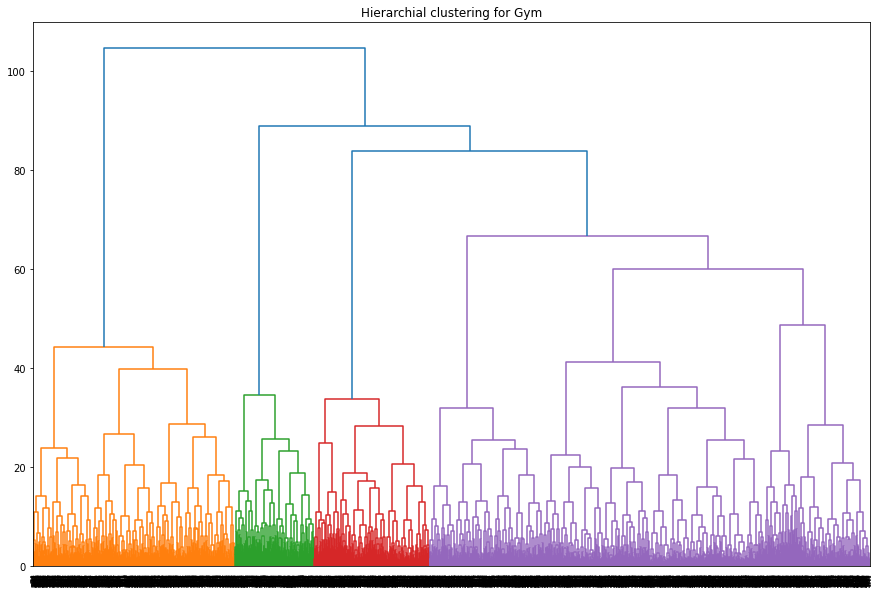

In [29]:
linked = linkage(x_sc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for Gym')
plt.show()

    - Berdasarkan Dendrogram di atas, pelanggan Gym terbagi menjadi 4 kluster

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 4.3. Melatih model pengklasteran dengan algoritma K-means dan prediksikan klaster pelanggannya dengan jumlah klater n=5

In [30]:
# tetapkan model k_means dengan 5 klaster
km = KMeans(n_clusters= 5)

km.fit(gym.drop(columns = ['Churn']))
labels = km.predict(gym.drop(columns= ['Churn']))

In [31]:
labels

array([4, 0, 0, ..., 0, 4, 3], dtype=int32)

# 4.4. Memeriksa nilai rata-rata fitur untuk semua klaster.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀥󠀳󠀰 

In [32]:
gym['cluster_km'] = labels

In [33]:
gym.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.514091350826045,0.839650145772595,0.451895043731778,0.279883381924198,0.897959183673469,4.301263362487853,0.407191448007775,28.973760932944607,105.932804130992963,3.996112730806608,3.544217687074830,1.852564173537317,1.708263839016004,0.334305150631681
1,0.521246458923513,0.881019830028329,0.511331444759207,0.347025495750708,0.898016997167139,5.400849858356940,0.433427762039660,29.344192634560905,250.984766730779967,5.001416430594901,4.169971671388102,1.903480218190926,1.843255315387595,0.178470254957507
2,0.468634686346863,0.856088560885609,0.516605166051661,0.332103321033210,0.926199261992620,5.822878228782288,0.431734317343173,29.845018450184501,356.481960107734210,5.383763837638377,4.420664206642066,2.019259785446184,2.009381958807865,0.044280442804428
3,0.511434511434511,0.844074844074844,0.495841995841996,0.320166320166320,0.902286902286902,4.755717255717256,0.423076923076923,29.401247401247403,174.873445094752583,4.376299376299376,3.749480249480249,1.895200425454709,1.785569339492693,0.226611226611227
4,0.508720930232558,0.824612403100775,0.488372093023256,0.293604651162791,0.907945736434108,4.198643410852713,0.387596899224806,28.908914728682170,35.600721999931416,3.855620155038760,3.394379844961240,1.836754913162511,1.692640823374053,0.349806201550388


    - Berdasarkan tabel di atas, nilai rata-rata semua kluster hampir sama
    - Yang menarik perhatian adalah kluster 3 karena nilai rata-rata untuk biaya tambahan yang mereka keluarkan 
    sangat rendah yakni hanya sebanyak 35 dollar. Sedangkan kluster yang lain mencapai di atas 100 dollar.
    - Nilai rata-rata Churn untuk kluster 3 juga paling tinggi yakni 0.349

# 4.5.Membuat grafik distribusi fitur untuk setiap klaster.󠀲󠀡󠀥󠀥󠀧󠀨󠀥󠀧󠀳󠀰

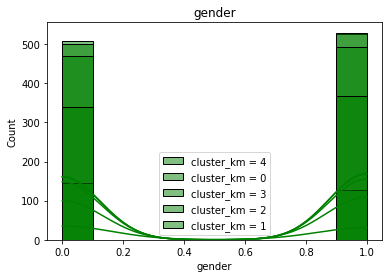

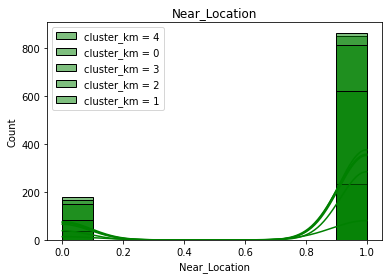

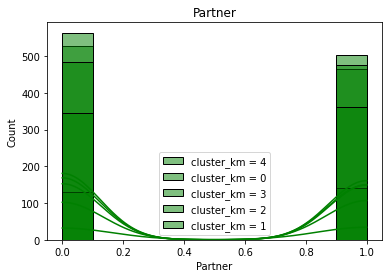

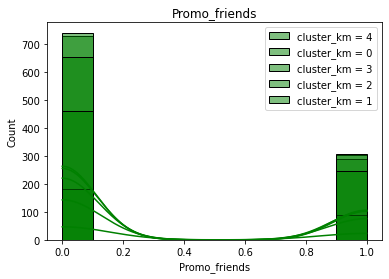

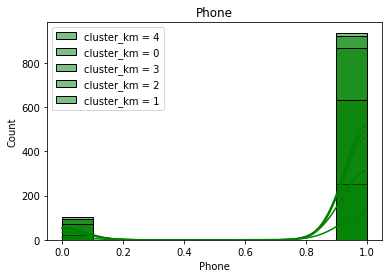

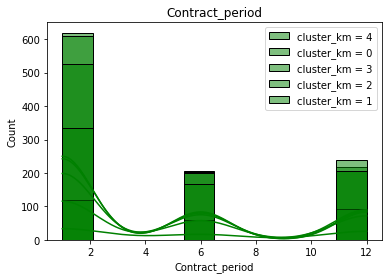

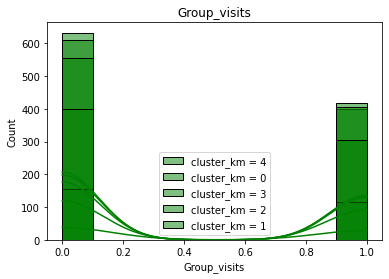

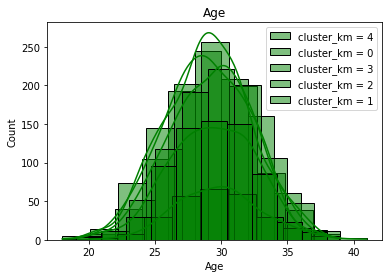

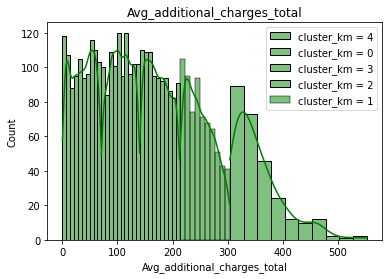

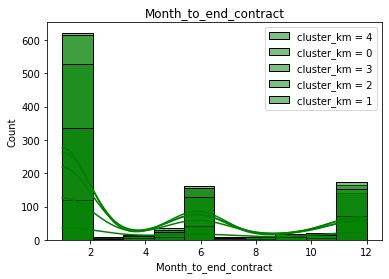

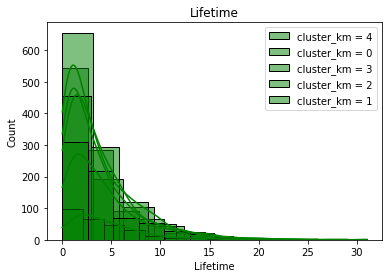

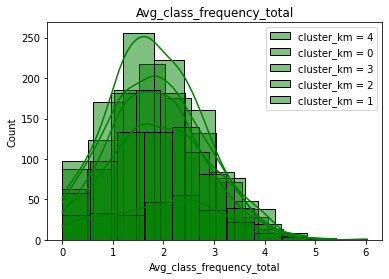

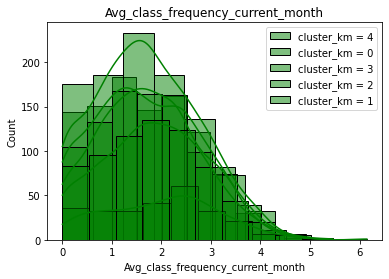

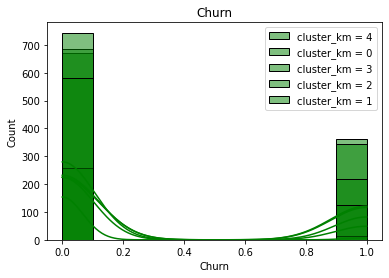

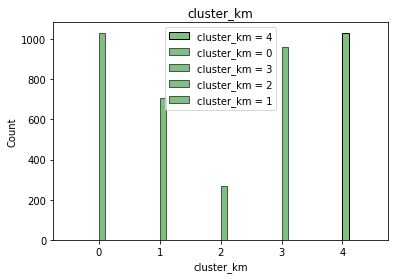

In [34]:
feat_hist(gym, 'cluster_km', gym.columns)

# 4.6. Menghitung tingkat churn untuk setiap klaster (gunakan metode groupby()) dan menentukan 󠀨Klaster pelanggan mana yang cenderung akan pergi, dan mana yang akan tetap setia

In [35]:
gym.groupby(['cluster_km']).mean()['Churn']

cluster_km
0    0.334305150631681
1    0.178470254957507
2    0.044280442804428
3    0.226611226611227
4    0.349806201550388
Name: Churn, dtype: float64

    - Rata-rata Churn yang tertinggi adalah kluster 3 yakni 0.349 dan klater 0 yakni 0.33. Sehingga kluster 3 dan 0 inilah 
    yang cenderung akan pergi
    - Rata-rata Churn yang terendah adalah kluster 4 yakni 0.044. Sehingga kluster 4 akan cenderung setia

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 5. Kesimpulan Umum

1. Jumlah pelanggan yang berhenti menjadi member (Churn) ada 1061 pelanggan atau 26.53 %
2. Jumlah pelanggan yang tetap menjadi member ada 2939 pelanggan atau 73.48 %
3. Rata-rata pelanggan yang Churn yang jauh dari lokasi adalah 0.87
4. Rata-rata pelanggan yang Churn memiliki sisa kontrak 1.6 bulan
5. Rata-rata pelanggan yang Churn memiliki lifetime 0.9 bulan
6. -Berdasarkan grafik Histogram di atas:
        1. Untuk pelanggan yang lokasinya dekat dengan gym banyak yang Churn
        2. Pelanggan karyawan mitra banyak yang Churn
        3. Pelanggan yang berasal dari referensi teman banyak yang Churn
        4. Pelanggan dengan periode kontrak 12 bulan banyak yang Churn
        5. Pelanggan dengan Lifetime 0-5 bulan banyak yang Churn

7. Berdasarkan grafik heatmap diatas faktor yang berpengaruh terhadap tingkat Churn adalah:
        - Semakin sedikit lifetime, tingkat Churn semakin naik
        - Semakin sedikit pelanggan menghadiri kelas dalam bulan berjalan, tingkat Churn akan meningkat
        - Semakin muda usia pelanggan, tingkat Churn akan meningkat
        
8. Untuk model Logistic Regression
    
        - Nilai akurasi = 92.2%
        - Nilai presisi = 86.6%
        - Nilai recall = 81.3%
        
9. Untuk model Random Forest
    
        - Nilai akurasi = 91.6%
        - Nilai presisi = 83.9%
        - Nilai recall = 81.8%
        
10. Berdasarkan Dendrogram di atas, pelanggan Gym terbagi menjadi 4 kluster
11. Berdasarkan tabel di atas, nilai rata-rata semua kluster hampir sama
    - Yang menarik perhatian adalah kluster 3 karena nilai rata-rata untuk biaya tambahan yang mereka keluarkan sangat 
    rendah yakni hanya sebanyak 35 dollar. Sedangkan kluster yang lain mencapai di atas 100 dollar.
    - Nilai rata-rata Churn untuk kluster 3 juga paling tinggi yakni 0.349
12. Rata-rata Churn yang tertinggi adalah kluster 3 yakni 0.349. Sehingga kluster 3 inilah yang cenderung akan pergi
13. Rata-rata Churn yang terendah adalah kluster 4 yakni 0.044. Sehingga kluster 4 akan cenderung setia


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 6.Rekomendasi dan Saran

1. Menawarkan potongan harga (diskon) untuk pelanggan yang mengambil kontrak jangka panjang (6 atau 12 bulan)
2. Untuk pelanggan yang akan habis kontrak diberikan penawaran agar mau memperpanjang kontrak
3. Menggabungkan layanan fitnes dengan layanan jasa lain (seperti 
Mengidentifikasi kelompok yang ditargetkan
Merekomendasikan langkah-langkah untuk mengurangi churn
Mendeskripsikan pola lain yang ditemui terkait interaksi pelanggan

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>